In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
from model_utils import *

In [3]:
data = np.load('ct_data.npz')
X_train = data['X_train']; X_val = data['X_val']; X_test = data['X_test']
y_train = data['y_train']; y_val = data['y_val']; y_test = data['y_test']

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40754, 384)
(5785, 384)
(6961, 384)
(40754,)
(5785,)
(6961,)


In [5]:
y_train

array([-1.12519785, -1.12777191, -1.13034601, ..., -0.79845267,
       -0.82308178, -0.82000318])

(array([2496., 3445., 6825., 6440., 5313., 4498., 3392., 3361., 3358.,
        1626.]),
 array([-1.86793865, -1.45849298, -1.0490473 , -0.63960163, -0.23015596,
         0.17928972,  0.58873539,  0.99818106,  1.40762674,  1.81707241,
         2.22651809]),
 <BarContainer object of 10 artists>)

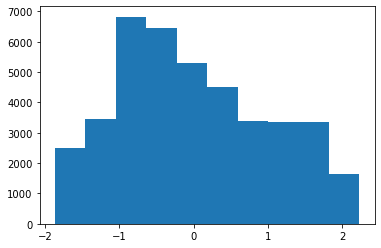

In [6]:
plt.hist(y_train)

In [7]:
np.percentile(y_val,[10,90])

array([-1.41596628,  1.34203676])

In [8]:
np.min(y_val),np.max(y_val)

(-2.0137800121400327, 2.0894818515397255)

In [9]:
print("median",np.median(y_val),np.percentile(y_val,[25,75]),np.mean(y_val))

median -0.3911123099382918 [-0.9379748   0.37444705] -0.2160085093241599


In [10]:
print(np.mean(y_train))

-9.13868774539957e-15


In [11]:
print(np.mean(y_val))

-0.2160085093241599


In [12]:
print("y_train mean: ",np.mean(y_train))
print("y_val mean: ",np.mean(y_val))
print('\nThe mean of training positions in y_train is Zero:',np.isclose(np.mean(y_train), 0))
print('\nThe mean of the 5,785 positions in the y_val array is not Zero:', not np.isclose(np.mean(y_val),0))

y_train mean:  -9.13868774539957e-15
y_val mean:  -0.2160085093241599

The mean of training positions in y_train is Zero: True

The mean of the 5,785 positions in the y_val array is not Zero: True


In [13]:
##Estimated mean of y_val with std. error
print(np.std(y_val)/np.sqrt(5785))

0.012903383410668334


In [14]:
print('\ny_val\nMean with standard error', np.mean(y_val),'±', np.std(y_val)/np.sqrt(5785))
print('\ny_train 1st 5785 \nMean with standard error', np.mean(y_train[:5785]),'±', np.std(y_train[:5785])/np.sqrt(5785))


y_val
Mean with standard error -0.2160085093241599 ± 0.012903383410668334

y_train 1st 5785 
Mean with standard error -0.44247687859693674 ± 0.01192627246273395


In [15]:
np.mean(y_train[:5785])

-0.44247687859693674

In [16]:
np.std(y_train[:5785])/np.sqrt(5785)

0.01192627246273395

In [17]:
print(np.std(y_val))
print(np.std(y_train))
print(np.std(y_train[:5785]))

0.9814208579483531
0.9999877311903766
0.907102593171408


In [18]:
### Standard dev is more reliable in sense it also accounts for more extreme cases and because
##of larger size standard error will become very less
X_train.shape

(40754, 384)

(array([ 290.,  636., 1019.,  983.,  774.,  758.,  363.,  325.,  325.,
         312.]),
 array([-2.01378001, -1.60345383, -1.19312764, -0.78280145, -0.37247527,
         0.03785092,  0.44817711,  0.85850329,  1.26882948,  1.67915567,
         2.08948185]),
 <BarContainer object of 10 artists>)

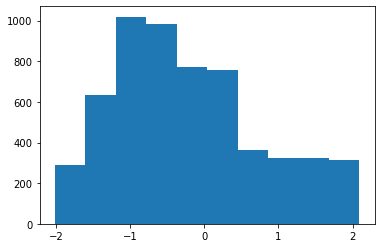

In [19]:
plt.hist(y_val)

In [20]:
print("columns with constant values across all rows: ",np.where(np.sum(np.abs(np.diff(X_train,axis=0)),axis=0)==0)[0])

columns with constant values across all rows:  [ 59  69 179 189 351]


In [21]:
unique_val_counts_per_col=np.array([len(np.unique(X_train[:,i])) for i in range(X_train.shape[1])])
np.where(unique_val_counts_per_col==1)

(array([ 59,  69, 179, 189, 351], dtype=int64),)

In [22]:
print("duplicate columns to be removed: ",np.delete(range(X_train.shape[1]),np.unique(X_train,True,axis=1)[1]))

duplicate columns to be removed:  [ 69  78  79 179 188 189 199 287 351 359]


In [23]:
for i in range(X_train.shape[1]-1):
    for j in range(i+1,X_train.shape[1]):
        if((X_train[:,i]==X_train[:,j]).all()):
            print("i:",i," j:",j)

i: 48  j: 78
i: 49  j: 79
i: 59  j: 69
i: 59  j: 179
i: 59  j: 189
i: 59  j: 351
i: 69  j: 179
i: 69  j: 189
i: 69  j: 351
i: 169  j: 199
i: 178  j: 188
i: 179  j: 189
i: 179  j: 351
i: 189  j: 351
i: 271  j: 287
i: 343  j: 359


In [24]:
def preprocessing(arr,given_delete_cols=np.array([])):
    if(given_delete_cols.size!=0):
        delete_cols=given_delete_cols
    else:
        unique_val_counts_per_col=np.array([len(np.unique(arr[:,i])) for i in range(arr.shape[1])])
        delete_cols1=np.where(unique_val_counts_per_col==1)[0]
        delete_cols2=np.delete(range(arr.shape[1]),np.unique(arr,True,axis=1)[1])
        print("columns index with same values in each row: ",delete_cols1)
        print("duplicate columns index except first one: ",delete_cols2)
        delete_cols=np.append(delete_cols1,delete_cols2)
        delete_cols=np.sort(np.unique(delete_cols))
        print("List of all columns to be deleted: ",delete_cols)
        
    arr=np.delete(arr,delete_cols,axis=1)
    return(delete_cols,arr)

In [25]:
delete_cols,X_train=preprocessing(X_train)
_,X_val=preprocessing(X_val,delete_cols)
_,X_test=preprocessing(X_test,delete_cols)

columns index with same values in each row:  [ 59  69 179 189 351]
duplicate columns index except first one:  [ 69  78  79 179 188 189 199 287 351 359]
List of all columns to be deleted:  [ 59  69  78  79 179 188 189 199 287 351 359]


In [26]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40754, 373)
(5785, 373)
(6961, 373)


In [27]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40754, 373)
(5785, 373)
(6961, 373)


## Q2

In [28]:
def phi_linear(Xin):
    return np.hstack([np.ones((Xin.shape[0],1)), Xin])

In [29]:
def RMSE(yy_true,yy_pred):
    return(np.sqrt((np.transpose(yy_true-yy_pred)@(yy_true-yy_pred))/(len(yy_true))))

In [30]:
def fit_linreg(X,yy,alpha):
    X=phi_linear(X)
    regularisation_ip_matrix=np.eye(X.shape[1])*np.sqrt(alpha)
    regularisation_ip_matrix[0][0]=0
    regularisation_op_vector=np.zeros(X.shape[1])
    X_updated=np.vstack([X,regularisation_ip_matrix])
    yy_updated=np.append(yy,regularisation_op_vector)
    w_fit=np.linalg.lstsq(X_updated, yy_updated, rcond=None)[0]
    return(w_fit)

In [31]:
w_fit_lstsq=fit_linreg(X=X_train,yy=y_train,alpha=30)

In [32]:
print(w_fit_lstsq.shape)

(374,)


In [33]:
w_fit_gradopt,bb_fit_gradopt=fit_linreg_gradopt(X=X_train,yy=y_train,alpha=30)

In [34]:
print(phi_linear(X_val).shape)
print(w_fit_lstsq.shape)

(5785, 374)
(374,)


In [35]:
yy_train_pred_lstsq=phi_linear(X_train)@w_fit_lstsq
yy_val_pred_lstsq=phi_linear(X_val)@w_fit_lstsq

yy_train_pred_gradopt=phi_linear(X_train)@np.append(bb_fit_gradopt,w_fit_gradopt)
yy_val_pred_gradopt=phi_linear(X_val)@np.append(bb_fit_gradopt,w_fit_gradopt)

In [36]:
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_lstsq))
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_gradopt))

print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_lstsq))
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_gradopt))

0.3567565397204054
0.35675590264260904
0.4230521968394697
0.42305976593027966


In [37]:
print("train error:\n")
print("fit_linreg:\t",RMSE(yy_true=y_train,yy_pred=yy_train_pred_lstsq))
print("fit_linreg_gradopt:\t",RMSE(yy_true=y_train,yy_pred=yy_train_pred_gradopt))

print("\ntest error:\n")
print("fit_linreg:\t",RMSE(yy_true=y_val,yy_pred=yy_val_pred_lstsq))
print("fit_linreg_gradopt:\t",RMSE(yy_true=y_val,yy_pred=yy_val_pred_gradopt))

train error:

fit_linreg:	 0.3567565397204054
fit_linreg_gradopt:	 0.35675590264260904

test error:

fit_linreg:	 0.4230521968394697
fit_linreg_gradopt:	 0.42305976593027966


In [38]:
np.isclose(RMSE(yy_true=y_val,yy_pred=yy_val_pred_lstsq),RMSE(yy_true=y_val,yy_pred=yy_val_pred_gradopt))

False

In [39]:
w_fit_lstsq[:4]

array([ 0.09105351, -0.06086155, -0.10609567,  0.07530311])

In [40]:
w_fit_gradopt[:3]

array([-0.06092799, -0.10608243,  0.07530472])

## Q3

In [41]:
def fit_logreg_gradopt(X, yy, alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (np.zeros(D), np.array(0))
    ww, bb = minimize_list(logreg_cost, init, args)
    return ww, bb


In [42]:
K = 20 # number of thresholded classification problems to fit
mx = np.max(y_train); mn = np.min(y_train); hh = (mx-mn)/(K+1)
thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
X_train_prob=np.empty((X_train.shape[0],K), dtype=float)
X_val_prob=np.empty((X_val.shape[0],K), dtype=float)
comb_weights_matrix=np.empty((X_val.shape[1],K), dtype=float)
comb_bias_vector=np.empty((K),dtype=float)

for kk in range(K):
    labels = (y_train > thresholds[kk]).astype(int)
    # ... fit logistic regression to these labels
    w_fit_gradopt,bb_fit_gradopt=fit_logreg_gradopt(X=X_train,yy=labels,alpha=30)
    
    yy_train_pred=phi_linear(X_train)@np.append(bb_fit_gradopt,w_fit_gradopt)
    sigma_yy_train_pred = 1/(1 + np.exp(-yy_train_pred))
    
    yy_val_pred=phi_linear(X_val)@np.append(bb_fit_gradopt,w_fit_gradopt)
    sigma_yy_val_pred = 1/(1 + np.exp(-yy_val_pred))
    
    X_train_prob[:,kk]=sigma_yy_train_pred
    X_val_prob[:,kk]=sigma_yy_val_pred
    comb_weights_matrix[:,kk]=w_fit_gradopt
    comb_bias_vector[kk]=bb_fit_gradopt

In [43]:
print(X_train.shape)
print(X_val.shape)

(40754, 373)
(5785, 373)


In [44]:
print(X_train_prob.shape)
print(X_val_prob.shape)

(40754, 20)
(5785, 20)


In [45]:
print(comb_weights_matrix.shape)
print(comb_bias_vector.shape)

(373, 20)
(20,)


In [46]:
import pandas as pd
pd.DataFrame(X_train_prob).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04,4.075400e+04
mean,0.982677,0.942828,0.902710,0.862615,0.808999,0.715291,6.256574e-01,5.542284e-01,4.916093e-01,4.290383e-01,3.685772e-01,3.143025e-01,2.715815e-01,2.321478e-01,1.929133e-01,1.536781e-01,1.143942e-01,7.520732e-02,3.587366e-02,6.649639e-03
std,0.109850,0.221254,0.279751,0.327792,0.356688,0.413487,4.446834e-01,4.604467e-01,4.619035e-01,4.583562e-01,4.471008e-01,4.306929e-01,4.068513e-01,3.834556e-01,3.651938e-01,3.377897e-01,2.901127e-01,2.341524e-01,1.494659e-01,3.956078e-02
min,0.033927,0.000762,0.000005,0.000021,0.000009,0.000002,2.940699e-07,9.223223e-08,2.594487e-08,1.424864e-07,6.327138e-08,1.375004e-08,1.327526e-08,9.023735e-09,2.347304e-08,1.004399e-08,2.536761e-10,8.675458e-10,1.834467e-10,3.354006e-08
25%,0.999229,0.998507,0.995068,0.990530,0.913212,0.216123,3.511556e-02,8.716533e-03,4.412144e-03,2.047843e-03,8.105429e-04,2.317392e-04,2.010748e-04,1.591693e-04,1.304027e-04,6.692936e-05,1.764025e-05,2.730961e-05,3.002534e-05,1.137260e-04
50%,0.999698,0.999487,0.998931,0.997876,0.992156,0.981000,9.551520e-01,8.852578e-01,4.270761e-01,9.031579e-02,2.102908e-02,6.986960e-03,5.369905e-03,4.441847e-03,3.379293e-03,1.512520e-03,7.450374e-04,3.736079e-04,3.619093e-04,6.241249e-04
75%,0.999895,0.999831,0.999747,0.999672,0.999655,0.998829,9.945150e-01,9.901159e-01,9.848821e-01,9.738093e-01,9.575189e-01,9.144810e-01,7.314641e-01,2.815004e-01,6.513714e-02,1.693389e-02,1.005436e-02,4.925124e-03,3.893212e-03,2.299984e-03
max,0.999998,0.999997,0.999997,0.999999,1.000000,1.000000,9.999963e-01,9.999944e-01,9.999933e-01,9.999888e-01,9.999941e-01,9.999869e-01,9.999564e-01,9.999414e-01,9.999502e-01,9.998324e-01,9.991079e-01,9.937297e-01,9.749431e-01,5.661798e-01


In [47]:
pd.DataFrame(X_val_prob).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03,5.785000e+03
mean,0.967476,0.910550,0.864714,0.810935,0.734464,0.620936,0.535513,4.567663e-01,3.908278e-01,3.229879e-01,2.721036e-01,2.377271e-01,2.079071e-01,1.717133e-01,1.292789e-01,1.138860e-01,8.934006e-02,5.240937e-02,2.630148e-02,3.382601e-03
std,0.147854,0.271228,0.322167,0.369987,0.403657,0.444805,0.455355,4.567606e-01,4.444747e-01,4.237793e-01,4.060992e-01,3.861854e-01,3.609729e-01,3.280979e-01,3.019494e-01,2.899669e-01,2.511645e-01,1.890342e-01,1.234145e-01,1.009850e-02
min,0.093373,0.002350,0.000014,0.000121,0.000026,0.000017,0.000010,7.618075e-07,1.581560e-07,6.034584e-07,7.588535e-07,8.876350e-08,6.331857e-08,6.059797e-08,1.442158e-07,3.288447e-08,3.369352e-09,4.088757e-09,1.958319e-09,2.492860e-07
25%,0.999275,0.998233,0.992010,0.963635,0.453864,0.038493,0.015533,3.477645e-03,2.262666e-03,1.080167e-03,4.937496e-04,1.324951e-04,1.225286e-04,1.375143e-04,1.040552e-04,3.989572e-05,1.517537e-05,1.232757e-05,1.560477e-05,8.945908e-05
50%,0.999711,0.999527,0.998957,0.997778,0.988476,0.949995,0.776712,2.162530e-01,5.241705e-02,1.495176e-02,6.578736e-03,2.175846e-03,2.092773e-03,1.627394e-03,1.265629e-03,7.633897e-04,4.899015e-04,1.745821e-04,1.929607e-04,5.289673e-04
75%,0.999886,0.999830,0.999779,0.999750,0.999590,0.996955,0.989243,9.754697e-01,9.577633e-01,8.827827e-01,7.496525e-01,4.263872e-01,2.149717e-01,1.083084e-01,2.911292e-02,9.194530e-03,1.019559e-02,5.349820e-03,2.711845e-03,2.010986e-03
max,0.999996,0.999994,0.999991,0.999996,1.000000,1.000000,0.999920,9.998860e-01,9.998502e-01,9.996663e-01,9.997829e-01,9.996138e-01,9.989864e-01,9.990768e-01,9.996761e-01,9.991302e-01,9.979802e-01,9.815159e-01,9.366307e-01,1.403792e-01


In [48]:
w_fit_lstsq1=fit_linreg(X=X_train_prob,yy=y_train,alpha=30)

In [49]:
yy_train_pred_lstsq1=phi_linear(X_train_prob)@w_fit_lstsq1
yy_val_pred_lstsq1=phi_linear(X_val_prob)@w_fit_lstsq1

In [50]:
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_lstsq1))
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_lstsq1))

0.1544115042995604
0.25424772980465987


In [51]:
print("Training RMSE: ",RMSE(yy_true=y_train,yy_pred=yy_train_pred_lstsq1))
print("Validation RMSE: ",RMSE(yy_true=y_val,yy_pred=yy_val_pred_lstsq1))

Training RMSE:  0.1544115042995604
Validation RMSE:  0.25424772980465987


## Q4.

In [52]:
def fit_nn_gradopt(X, yy,K,alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    ## Following GlorotInit initialisation
    init = (np.random.normal(loc=0,scale=np.sqrt(2/(K+1)),size=K), 
            np.array(0),np.random.normal(loc=0,scale=np.sqrt(2/(K+D)),size=(K,D)),np.zeros(K))
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [53]:
##Fitting the model
ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_nn=fit_nn_gradopt(X=X_train,yy=y_train,K=20,alpha=30)

In [54]:
##Predictions
params=(ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_nn)
yy_train_pred_nn=nn_cost(params,X_train,yy=None,alpha=30)
yy_val_pred_nn=nn_cost(params,X_val,yy=None,alpha=30)

In [55]:
##Performance
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn))
val_nn_RMSE=RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn)
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn))

0.14003433452158495
0.2702886385000156


In [56]:
yy_test_pred_nn=nn_cost(params,X_test,yy=None,alpha=30)
print(RMSE(yy_true=y_test,yy_pred=yy_test_pred_nn))

0.30422822771944025


In [57]:
##Performance
print("Training RMSE: ",RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn))
val_nn_RMSE=RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn)
print("Validation RMSE: ",val_nn_RMSE)

Training RMSE:  0.14003433452158495
Validation RMSE:  0.2702886385000156


In [58]:
# ##fitting same model 10 times and then taking avg across performances
# train_RMSE_list=[]
# val_RMSE_list=[]
# for i in range(3):
#     ##Fitting the model
#     ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_n=fit_nn_gradopt(X=X_train,yy=y_train,K=20,alpha=30)
    
#     ##Predictions
#     params=(ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_nn)
#     yy_train_pred_nn=nn_cost(params,X_train,yy=None,alpha=30)
#     yy_val_pred_nn=nn_cost(params,X_val,yy=None,alpha=30)
    
#     ##Performance
#     train_RMSE_list=train_RMSE_list+[RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn)]
#     val_RMSE_list=val_RMSE_list+[RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn)]
#     print(train_RMSE_list)
#     print(val_RMSE_list)

# print("average training error: ",np.mean(train_RMSE_list))
# print("average val error: ",np.mean(val_RMSE_list))

In [59]:
def fit_nn_gradopt1(X, yy,K,alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    ## Following GlorotInit initialisation
    init = (w_fit_lstsq1[1:], 
            w_fit_lstsq1[0],comb_weights_matrix.T,comb_bias_vector)
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [60]:
##Fitting the model
ww_fit_nn1, bb_fit_nn1, V_fit_nn1, bk_fit_nn1=fit_nn_gradopt1(X=X_train,yy=y_train,K=20,alpha=30)

In [61]:
##Predictions
params1=(ww_fit_nn1, bb_fit_nn1, V_fit_nn1, bk_fit_nn1)
yy_train_pred_nn1=nn_cost(params1,X_train,yy=None,alpha=30)
yy_val_pred_nn1=nn_cost(params1,X_val,yy=None,alpha=30)

In [62]:
##Performance
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn1))
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn1))

0.13962037078979167
0.2683138681266855


In [63]:
##Performance
print("Training RMSE: ",RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn1))
print("Validation RMSE: ",RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn1))

Training RMSE:  0.13962037078979167
Validation RMSE:  0.2683138681266855


In [64]:
print(ww_fit_nn,"\n\nweights obtained from LR\n",ww_fit_nn1)

[ 0.09674219 -1.06340694  0.13128641  0.81785585 -1.8579202   0.09702058
  0.10893049  0.1371555  -1.16466112  0.10728441  0.12150821  0.10771016
  0.1436864   0.12312926  0.0708245  -1.3225307   2.31433516  0.06789376
  0.11313603 -1.20903445] 

weights obtained from LR
 [ 6.97123863e-03  6.95914470e-03  7.38662065e-03  1.19046433e+00
  1.22965858e+00 -7.13423394e-01  2.05042631e-02  1.06794438e+00
  1.57713470e-03  7.58391495e-01  2.25517861e+00  7.07615282e-05
  8.92235390e-03 -2.66433744e-03  3.46359293e-03  4.93270599e-03
  1.84330836e+00  1.74559487e-01  1.29214040e+00 -8.99902482e-04]


(array([ 1.,  4.,  0.,  0., 13.,  0.,  1.,  0.,  0.,  1.]),
 array([-1.8579202 , -1.44069467, -1.02346913, -0.60624359, -0.18901806,
         0.22820748,  0.64543302,  1.06265855,  1.47988409,  1.89710963,
         2.31433516]),
 <BarContainer object of 10 artists>)

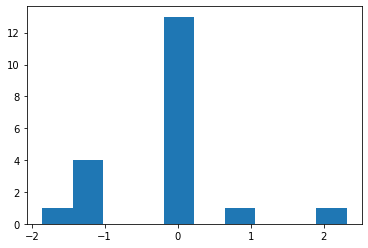

In [65]:
plt.hist(ww_fit_nn)

(array([ 1.,  0., 12.,  0.,  1.,  0.,  4.,  0.,  1.,  1.]),
 array([-0.71342339, -0.41656319, -0.11970299,  0.17715721,  0.47401741,
         0.77087761,  1.06773781,  1.36459801,  1.66145821,  1.95831841,
         2.25517861]),
 <BarContainer object of 10 artists>)

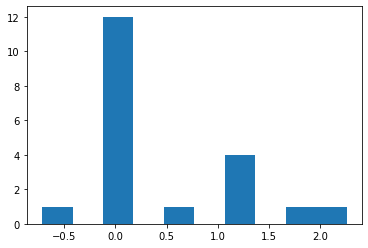

In [66]:
plt.hist(ww_fit_nn1)

In [67]:
# ##fitting same model 10 times and then taking avg across performances
# train_RMSE_list1=[]
# val_RMSE_list1=[]
# for i in range(10):
#     ##Fitting the model
#     ww_fit_nn1, bb_fit_nn1, V_fit_nn1, bk_fit_nn1=fit_nn_gradopt1(X=X_train,yy=y_train,K=20,alpha=30)
    
#     ##Predictions
#     params1=(ww_fit_nn1, bb_fit_nn1, V_fit_nn1, bk_fit_nn1)
#     yy_train_pred_nn1=nn_cost(params1,X_train,yy=None,alpha=30)
#     yy_val_pred_nn1=nn_cost(params1,X_val,yy=None,alpha=30)
    
#     ##Performance
#     train_RMSE_list1=train_RMSE_list1+[RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn1)]
#     val_RMSE_list1=val_RMSE_list1+[RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn1)]

# print("average training error: ",np.mean(train_RMSE_list1))
# print("average val error: ",np.mean(val_RMSE_list1))

## Q5.

In [68]:
def fit_reg_nn(X_train,yy_train,X_val,yy_val,K,alpha):
    D = X_train.shape[1]
    args = (X_train, yy_train, alpha)
    
    ## Following GlorotInit initialisation
    init = (np.random.normal(loc=0,scale=np.sqrt(2/(K+1)),size=K), 
            np.array(0),np.random.normal(loc=0,scale=np.sqrt(2/(K+D)),size=(K,D)),np.zeros(K))
    
    ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_nn = minimize_list(nn_cost, init, args)
    params=(ww_fit_nn, bb_fit_nn, V_fit_nn, bk_fit_nn)
    
    yy_val_pred_nn=nn_cost(params,X_val,yy=None,alpha=alpha)
    return(RMSE(yy_true=yy_val,yy_pred=yy_val_pred_nn))

In [69]:
fit_reg_nn(X_train=X_train,yy_train=y_train,X_val=X_val,yy_val=y_val,K=20,alpha=30)

0.2708707794692373

In [70]:
def POI_acquisition(alpha_grid,posterior_mean,posterior_std,best_performance_value):
    probs = norm.cdf((posterior_mean - best_performance_value) / (posterior_std+1E-9))
    return(alpha_grid[np.argmax(probs)])

def bayes_optimiser(X_train,yy_train,X_val,yy_val,baseline_performance_value,alpha_grid,num_iter,verbose=False):
    training_locs=np.random.choice(alpha_grid, 3)
    testing_locs=np.setdiff1d(alpha_grid,training_locs)
    
    #K=20 refers to 20 hidden units in hidden layer
    RMSE_arr=np.array(list(map(lambda x:fit_reg_nn(X_train,yy_train,X_val,yy_val,K=20,alpha=x),training_locs)))
    performance_arr=baseline_performance_value-RMSE_arr    
    
    i=1
    while(i<=num_iter and len(testing_locs)>0):
        posterior_mean,posterior_cov=gp_post_par(X_rest=testing_locs, X_obs=training_locs, yy=performance_arr)
        posterior_std = np.sqrt(np.diag(posterior_cov))
        
        next_alpha=POI_acquisition(testing_locs,posterior_mean,posterior_std,np.max(performance_arr))
        next_RMSE=fit_reg_nn(X_train,yy_train,X_val,yy_val,K=20,alpha=next_alpha)
        
        training_locs=np.append(training_locs,next_alpha)
        testing_locs=np.setdiff1d(testing_locs,next_alpha)
        performance_arr=np.append(performance_arr,baseline_performance_value-next_RMSE)
        RMSE_arr=np.append(RMSE_arr,next_RMSE)
        
        if(verbose):
            print("trial number: "+str(i)+" alpha: "+str(next_alpha)+" RMSE: "+str(next_RMSE))
        i=i+1
    
    return(training_locs,RMSE_arr,training_locs[np.argmin(RMSE_arr)],np.min(RMSE_arr))

In [71]:
alpha_history,RMSE_history,best_alpha,best_RMSE=bayes_optimiser(X_train=X_train,yy_train=y_train,X_val=X_val,yy_val=y_val,
                                                                baseline_performance_value=val_nn_RMSE,
                                                                alpha_grid=np.arange(0,50,0.02),num_iter=5,verbose=True)

trial number: 1 alpha: 17.04 RMSE: 0.2768022652073188
trial number: 2 alpha: 0.0 RMSE: 0.26587020591107535
trial number: 3 alpha: 0.02 RMSE: 0.2770755872986901
trial number: 4 alpha: 49.980000000000004 RMSE: 0.2925902388177989
trial number: 5 alpha: 26.060000000000002 RMSE: 0.26832570224465363


In [72]:
best_alpha

0.0

In [73]:
##Fitting the model
ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha=fit_nn_gradopt(X=X_train,yy=y_train,
                                                                                                     K=20,alpha=best_alpha)
##Predictions
params_best_alpha=(ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha)
yy_train_pred_nn_best_alpha=nn_cost(params_best_alpha,X_train,yy=None,alpha=best_alpha)
yy_val_pred_nn_best_alpha=nn_cost(params_best_alpha,X_val,yy=None,alpha=best_alpha)
yy_test_pred_nn_best_alpha=nn_cost(params_best_alpha,X_test,yy=None,alpha=best_alpha)

##Performance
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn_best_alpha))
val_nn_RMSE_best_alpha=RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn_best_alpha)
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn_best_alpha))
print(RMSE(yy_true=y_test,yy_pred=yy_test_pred_nn_best_alpha))

0.05827332443759188
0.2641690945749721
0.2937430639214382


In [74]:
ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha=fit_nn_gradopt(X=X_train,yy=y_train,
                                                                                                     K=20,alpha=best_alpha)
params_best_alpha=(ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha)
yy_test_pred_nn_best_alpha=nn_cost(params_best_alpha,X_test,yy=None,alpha=best_alpha)
print(RMSE(yy_true=y_test,yy_pred=yy_test_pred_nn_best_alpha))

0.2936897070574244


In [75]:
best_alpha=4.08
##Fitting the model
ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha=fit_nn_gradopt(X=X_train,yy=y_train,
                                                                                                     K=20,alpha=best_alpha)
##Predictions
params_best_alpha=(ww_fit_nn_best_alpha, bb_fit_nn_best_alpha, V_fit_nn_best_alpha, bk_fit_nn_best_alpha)
yy_train_pred_nn_best_alpha=nn_cost(params_best_alpha,X_train,yy=None,alpha=best_alpha)
yy_val_pred_nn_best_alpha=nn_cost(params_best_alpha,X_val,yy=None,alpha=best_alpha)

##Performance
print(RMSE(yy_true=y_train,yy_pred=yy_train_pred_nn_best_alpha))
val_nn_RMSE_best_alpha=RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn_best_alpha)
print(RMSE(yy_true=y_val,yy_pred=yy_val_pred_nn_best_alpha))

0.07526859423435905
0.24290555682810655


In [76]:
alpha_history,RMSE_history,best_alpha,best_RMSE=bayes_optimiser(X_train=X_train,yy_train=y_train,X_val=X_val,yy_val=y_val,
                                                                baseline_performance_value=val_nn_RMSE,
                                                                alpha_grid=np.arange(0,50,0.02),num_iter=100,verbose=True)

trial number: 1 alpha: 2.8000000000000003 RMSE: 0.2509295991251492
trial number: 2 alpha: 1.1400000000000001 RMSE: 0.2574672848854981
trial number: 3 alpha: 5.32 RMSE: 0.2607859872844001
trial number: 4 alpha: 0.0 RMSE: 0.2746088777956945
trial number: 5 alpha: 7.04 RMSE: 0.24547757820512459
trial number: 6 alpha: 8.14 RMSE: 0.2674002193714472
trial number: 7 alpha: 16.46 RMSE: 0.2648551003706191
trial number: 8 alpha: 49.980000000000004 RMSE: 0.2802393763772188
trial number: 9 alpha: 22.52 RMSE: 0.27355808873502296
trial number: 10 alpha: 5.74 RMSE: 0.2569678341618683
trial number: 11 alpha: 10.82 RMSE: 0.2544934323119925
trial number: 12 alpha: 41.1 RMSE: 0.2777965501293198
trial number: 13 alpha: 10.84 RMSE: 0.26416598180101386
trial number: 14 alpha: 5.42 RMSE: 0.23938652390918072
trial number: 15 alpha: 5.5600000000000005 RMSE: 0.2588229553477866
trial number: 16 alpha: 14.94 RMSE: 0.2574056863754749
trial number: 17 alpha: 9.42 RMSE: 0.26305307724269994
trial number: 18 alpha: 18

In [77]:
best_alpha

3.7

In [78]:
best_RMSE

0.23501771067780647